In [44]:
!pip install --user snowflake-connector-python


In [45]:
import snowflake.connector
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Establish connection
conn = snowflake.connector.connect(
          user='aadishmn',
            password='Qwert@123',
            account='tz70231.central-india.azure',
            warehouse='COMPUTE_WH',
            database='JMAN',
            schema='JMAN_SCHEMA',
            role='ACCOUNTADMIN'
)

cur = conn.cursor()

cur.execute(f'SELECT * FROM JMAN.JMAN_SCHEMA_MART.FINAL_TABLE')

rows = cur.fetchall()

# Close the cursor and connection
cur.close()
conn.close()

In [46]:
dataset = pd.DataFrame(rows, columns=[x[0] for x in cur.description])

In [47]:
dataset.to_csv('src_data.csv', index=False)
df=dataset.copy()

In [48]:
df

,FIRST_NAME,LAST_NAME,EMAIL,GENDER,DOB_DD_MM_YYYY,USER_TYPE,ROLE,AGE,CLIENT_NAME,PROJECT_NAME,...,HOURS_OVER_OR_UNDER,FEEDBACK_START_PERIOD,FEEDBACK_END_PERIOD,Q1,Q2,Q3,Q4,Q5,Q6,FEEDBACK_COMMENTS
0,Alli,Adamowitz,aadamowitz16@hud.gov,Female,10-02-1984,User,intern,40,"VonRueden, Bartell and Halvorson",Software_Developper,...,15.0,2024-02-01,2024-02-08,3,4,4,1,2,3,Struggling to cope with changing project requi...
1,Alli,Adamowitz,aadamowitz16@hud.gov,Female,02-07-1994,User,intern,30,Crist-Wiegand,Software_Developper,...,15.0,2024-02-01,2024-02-08,3,4,4,1,2,3,Struggling to cope with changing project requi...
2,Alli,Adamowitz,aadamowitz16@hud.gov,Female,02-07-1994,User,intern,30,Crist-Wiegand,Software_Developper,...,15.0,2024-02-01,2024-02-08,3,4,4,1,2,3,Struggling to cope with changing project requi...
3,Alli,Adamowitz,aadamowitz16@hud.gov,Female,10-02-1984,User,intern,40,"VonRueden, Bartell and Halvorson",Software_Developper,...,15.0,2024-02-01,2024-02-08,3,4,4,1,2,3,Struggling to cope with changing project requi...
4,Alli,Adamowitz,aadamowitz16@hud.gov,Female,02-07-1994,User,intern,30,"VonRueden, Bartell and Halvorson",Software_Developper,...,15.0,2024-02-01,2024-02-08,3,4,4,1,2,3,Struggling to cope with changing project requi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59449,Zed,Hardway,zhardwayld@un.org,Female,29-03-1999,User,intern,25,Strosin Inc,Consulting,...,-3.0,None,None,None,None,None,None,None,None,None
59450,Zed,Hardway,zhardwayld@un.org,Female,29-03-1999,User,intern,25,Strosin Inc,Consulting,...,-3.0,None,None,None,None,None,None,None,None,None
59451,Zed,Hardway,zhardwayld@un.org,Female,15-10-1995,User,intern,29,Leannon-Grimes,Software_Developper,...,-3.0,None,None,None,None,None,None,None,None,None
59452,Zed,Hardway,zhardwayld@un.org,Female,15-10-1995,User,intern,29,Leannon-Grimes,Software_Developper,...,-3.0,None,None,None,None,None,None,None,None,None


In [49]:
threshold_hours = 35
df['ATTENDANCE_REGULARIZATION'] = (df['TOTAL_WEEK_HOURS'] < threshold_hours).astype(int)


In [50]:
df

,FIRST_NAME,LAST_NAME,EMAIL,GENDER,DOB_DD_MM_YYYY,USER_TYPE,ROLE,AGE,CLIENT_NAME,PROJECT_NAME,...,FEEDBACK_START_PERIOD,FEEDBACK_END_PERIOD,Q1,Q2,Q3,Q4,Q5,Q6,FEEDBACK_COMMENTS,ATTENDANCE_REGULARIZATION
0,Alli,Adamowitz,aadamowitz16@hud.gov,Female,10-02-1984,User,intern,40,"VonRueden, Bartell and Halvorson",Software_Developper,...,2024-02-01,2024-02-08,3,4,4,1,2,3,Struggling to cope with changing project requi...,0
1,Alli,Adamowitz,aadamowitz16@hud.gov,Female,02-07-1994,User,intern,30,Crist-Wiegand,Software_Developper,...,2024-02-01,2024-02-08,3,4,4,1,2,3,Struggling to cope with changing project requi...,0
2,Alli,Adamowitz,aadamowitz16@hud.gov,Female,02-07-1994,User,intern,30,Crist-Wiegand,Software_Developper,...,2024-02-01,2024-02-08,3,4,4,1,2,3,Struggling to cope with changing project requi...,0
3,Alli,Adamowitz,aadamowitz16@hud.gov,Female,10-02-1984,User,intern,40,"VonRueden, Bartell and Halvorson",Software_Developper,...,2024-02-01,2024-02-08,3,4,4,1,2,3,Struggling to cope with changing project requi...,0
4,Alli,Adamowitz,aadamowitz16@hud.gov,Female,02-07-1994,User,intern,30,"VonRueden, Bartell and Halvorson",Software_Developper,...,2024-02-01,2024-02-08,3,4,4,1,2,3,Struggling to cope with changing project requi...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59449,Zed,Hardway,zhardwayld@un.org,Female,29-03-1999,User,intern,25,Strosin Inc,Consulting,...,None,None,None,None,None,None,None,None,None,0
59450,Zed,Hardway,zhardwayld@un.org,Female,29-03-1999,User,intern,25,Strosin Inc,Consulting,...,None,None,None,None,None,None,None,None,None,0
59451,Zed,Hardway,zhardwayld@un.org,Female,15-10-1995,User,intern,29,Leannon-Grimes,Software_Developper,...,None,None,None,None,None,None,None,None,None,0
59452,Zed,Hardway,zhardwayld@un.org,Female,15-10-1995,User,intern,29,Leannon-Grimes,Software_Developper,...,None,None,None,None,None,None,None,None,None,0


In [51]:
# Ensure 'ATTENDANCE_REGULARIZATION' is numerical
df['ATTENDANCE_REGULARIZATION'] = pd.to_numeric(df['ATTENDANCE_REGULARIZATION'], errors='coerce')

df_positive = df[df['ATTENDANCE_REGULARIZATION'] == 1].sample(n=2000, random_state=45)
df_negative = df[df['ATTENDANCE_REGULARIZATION'] == 0].sample(n=2000, random_state=45)
df_sampled = pd.concat([df_positive, df_negative])
df = df_sampled.sample(frac=1, random_state=42).reset_index(drop=True)
print(df['ATTENDANCE_REGULARIZATION'].value_counts())

df.to_csv('new_src_data.csv', index=False)


ATTENDANCE_REGULARIZATION
1    2000
0    2000
Name: count, dtype: int64


In [52]:
file_path = 'new_src_data.csv'
df = pd.read_csv(file_path)
print(df.head())


  FIRST_NAME  LAST_NAME                         EMAIL  GENDER DOB_DD_MM_YYYY  \
0    Chiarra   Avrashin           cavrashin2p@fda.gov    Male     24-07-2000   
1   Napoleon     Belfit      nbelfitnv@washington.edu    Male     21-04-1979   
2     Tawsha    Paridge           tparidge7w@furl.net    Male     01-02-1988   
3       Poul     Candey            pcandeykz@ebay.com  Female     18-07-1987   
4        Dal  MacAleese  dmacaleeserm@cyberchimps.com    Male     21-03-1991   

  USER_TYPE                 ROLE  AGE                 CLIENT_NAME  \
0      User  software_developper   24                Reynolds LLC   
1      User               intern   45                 Gerlach LLC   
2      User  software_developper   36   Keebler, Feil and Monahan   
3      User           consultant   37                Cummings Inc   
4      User               intern   33  Wyman, Langosh and Wiegand   

          PROJECT_NAME  ... FEEDBACK_START_PERIOD FEEDBACK_END_PERIOD   Q1  \
0  Software_Developper  ..

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   FIRST_NAME                 4000 non-null   object 
 1   LAST_NAME                  4000 non-null   object 
 2   EMAIL                      4000 non-null   object 
 3   GENDER                     4000 non-null   object 
 4   DOB_DD_MM_YYYY             4000 non-null   object 
 5   USER_TYPE                  4000 non-null   object 
 6   ROLE                       4000 non-null   object 
 7   AGE                        4000 non-null   int64  
 8   CLIENT_NAME                4000 non-null   object 
 9   PROJECT_NAME               4000 non-null   object 
 10  PROJECT_START_DATE         4000 non-null   object 
 11  PROJECT_END_DATE           4000 non-null   object 
 12  PROJECT_DURATION           4000 non-null   int64  
 13  PROJECT_CATEGORY           4000 non-null   objec

# Uni-variate Analysis

C:\Users\AadishNagarajan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


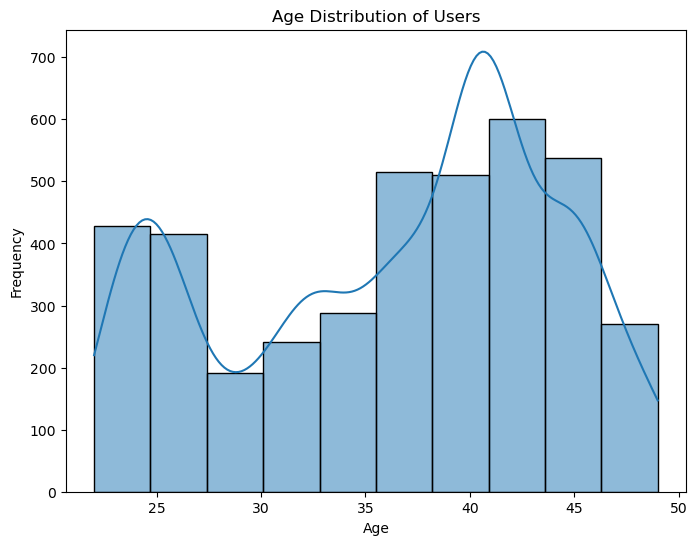

In [54]:
#Count of users based on age groups

plt.figure(figsize=(8, 6))
sns.histplot(df['AGE'], bins=10, kde=True)
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

C:\Users\AadishNagarajan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


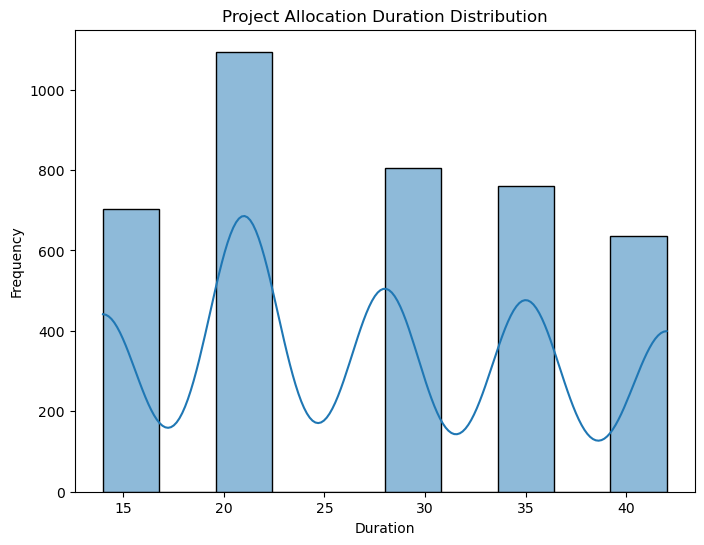

In [55]:
# Plot project allocation duration distribution

plt.figure(figsize=(8, 6))
sns.histplot(df['ALLOCATION_DURATION'].dropna(), bins=10, kde=True)
plt.title('Project Allocation Duration Distribution')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='ROLE', data=df)
plt.title('Distribution of Roles')
plt.xlabel('Role')
plt.ylabel('Count')
plt.show()


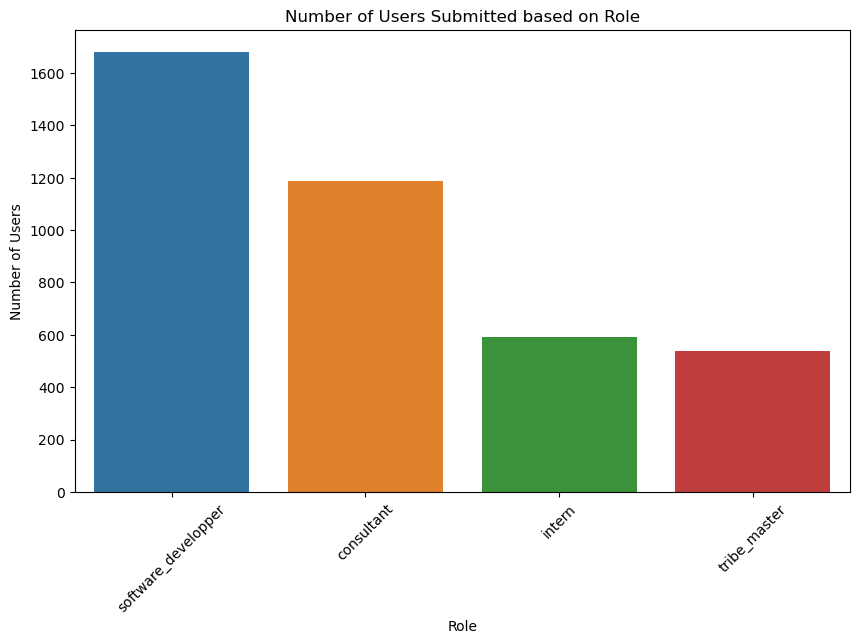

In [56]:
#No of submissions based on the role

role_counts = df['ROLE'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=role_counts.index, y=role_counts.values)
plt.title('Number of Users Submitted based on Role')
plt.xlabel('Role')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

C:\Users\AadishNagarajan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


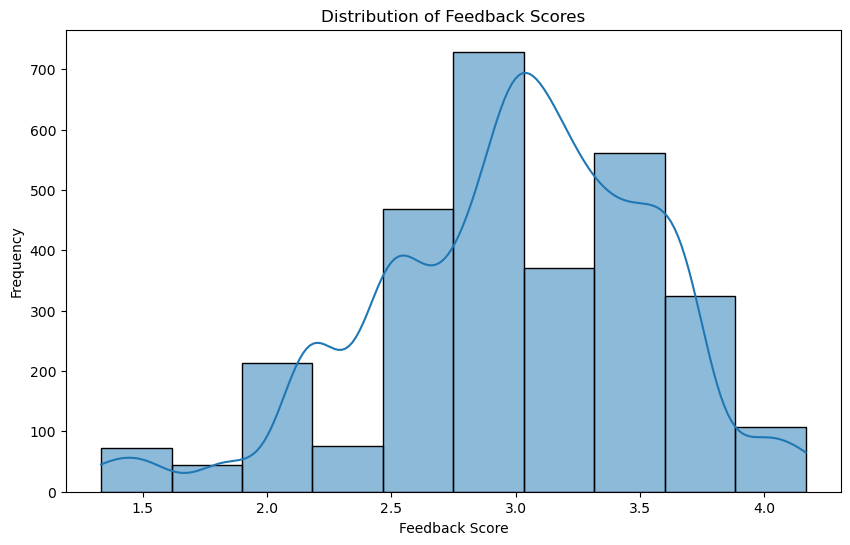

In [57]:
# Calculate overall feedback score

feedback_columns = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6']
df['FEEDBACK_SCORE'] = df[feedback_columns].mean(axis=1)
plt.figure(figsize=(10, 6))
sns.histplot(df['FEEDBACK_SCORE'], bins=10, kde=True)
plt.title('Distribution of Feedback Scores')
plt.xlabel('Feedback Score')
plt.ylabel('Frequency')
plt.show()


C:\Users\AadishNagarajan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\AadishNagarajan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\AadishNagarajan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\AadishNagarajan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

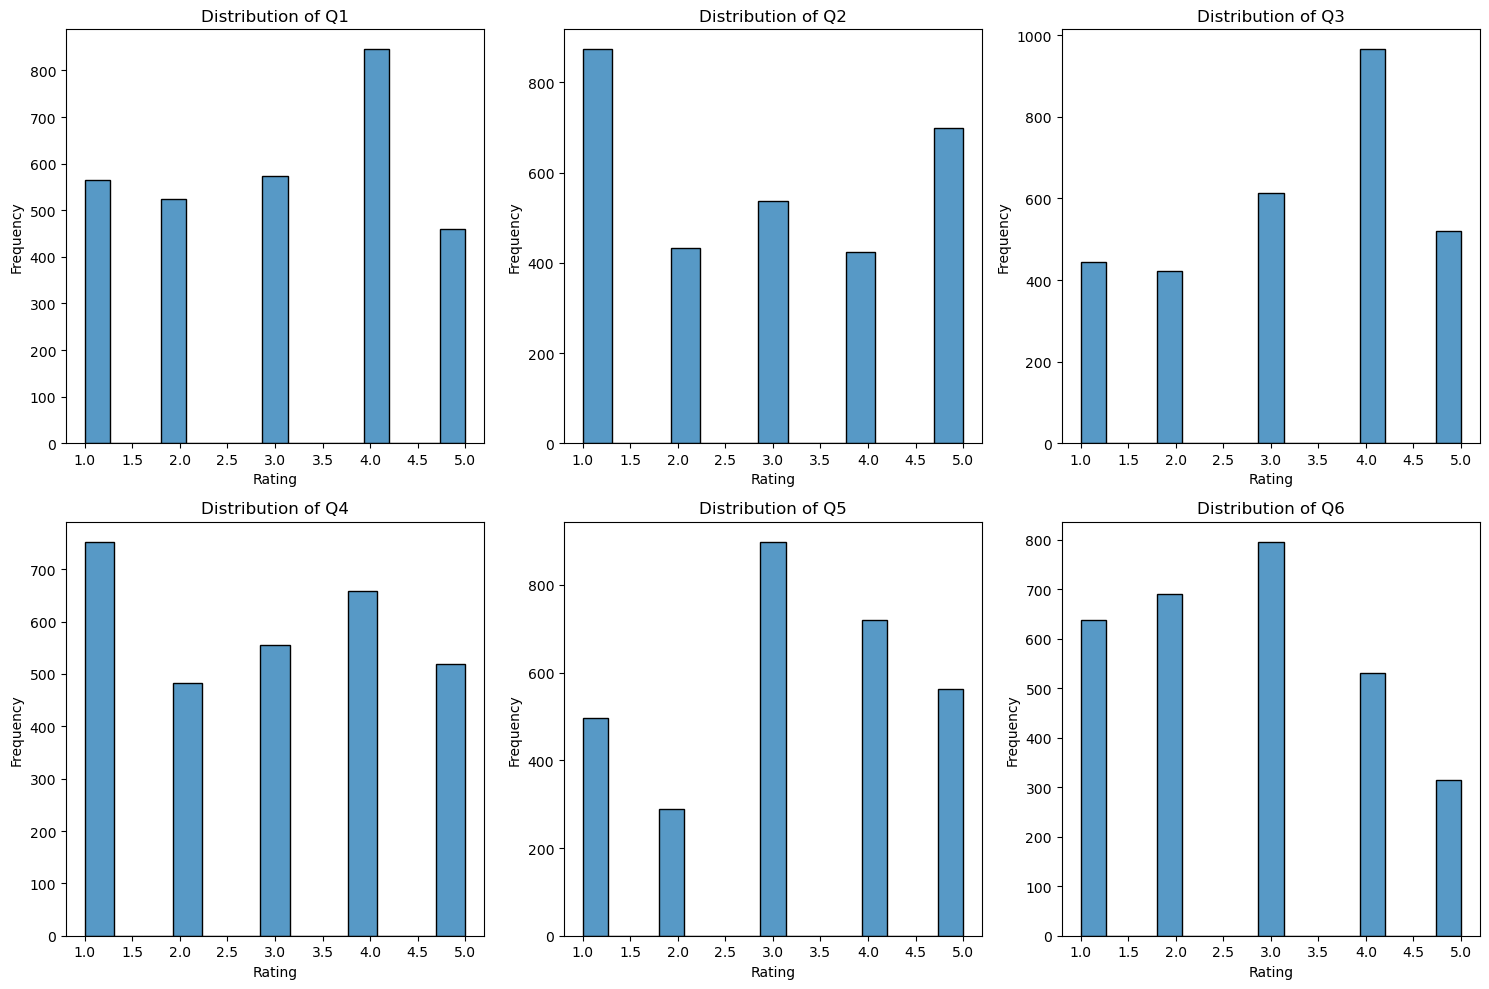

In [58]:
#Analyzing feedback rating for each questions

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
feedback_questions = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6']
for i, question in enumerate(feedback_questions):
    sns.histplot(df[question], ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Distribution of {question}')
    axes[i//3, i%3].set_xlabel('Rating')
    axes[i//3, i%3].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


# Bi-variate Analysis

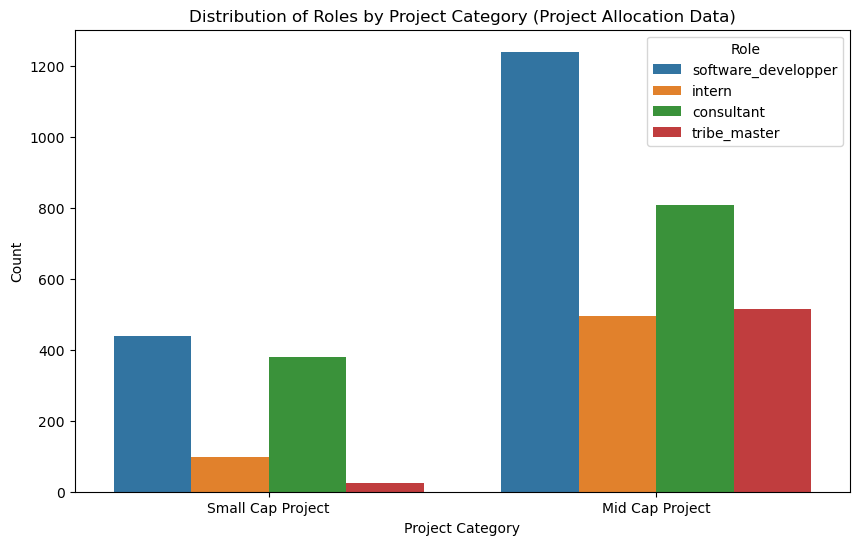

In [59]:
# Roles vs Project category based on the count

plt.figure(figsize=(10, 6))
sns.countplot(x='PROJECT_CATEGORY', hue='ROLE', data=df)
plt.title('Distribution of Roles by Project Category (Project Allocation Data)')
plt.xlabel('Project Category')
plt.ylabel('Count')
plt.legend(title='Role')
plt.show()


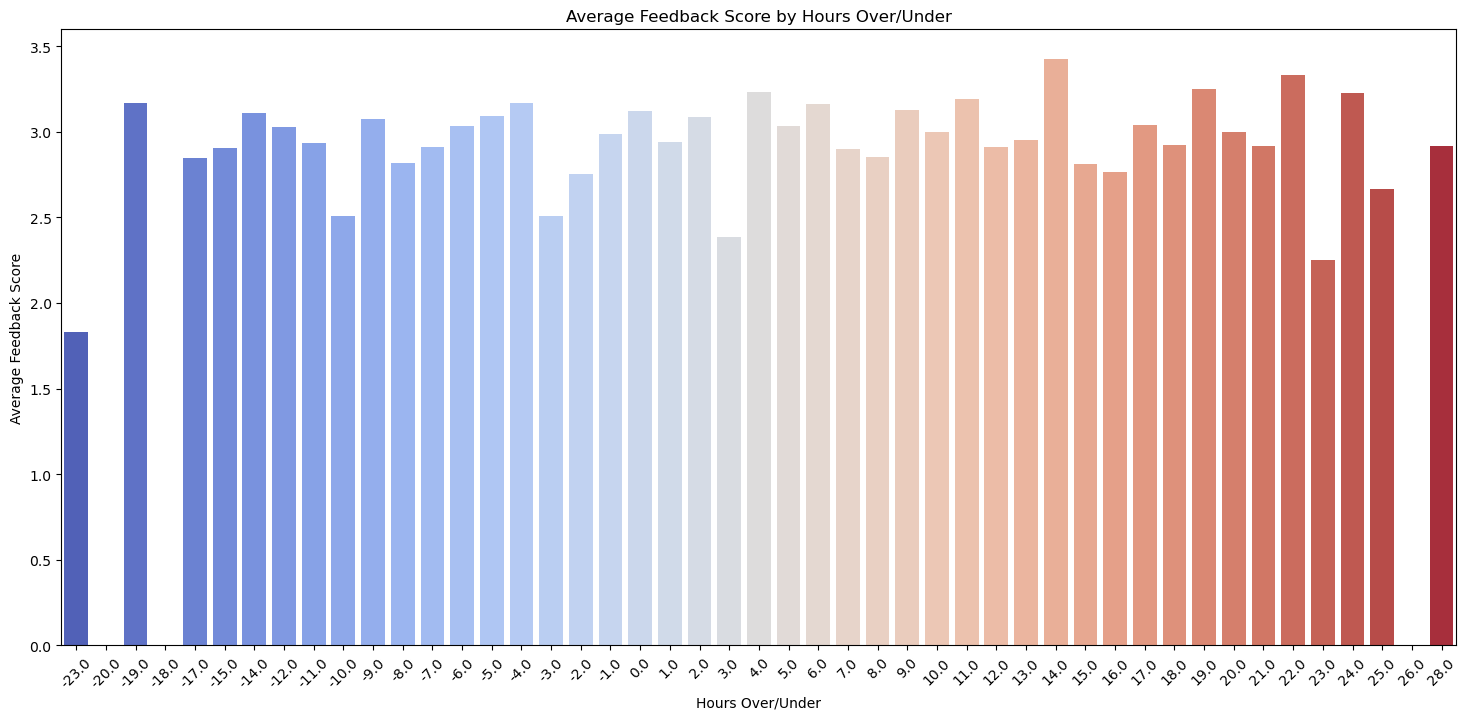

In [60]:
# Group the data by HOURS_OVER_OR_UNDER and calculate the mean of FEEDBACK_SCORE for each group

grouped_data = df.groupby('HOURS_OVER_OR_UNDER')['FEEDBACK_SCORE'].mean().reset_index()
plt.figure(figsize=(18, 8))
sns.barplot(x='HOURS_OVER_OR_UNDER', y='FEEDBACK_SCORE', data=grouped_data, palette='coolwarm')
plt.title('Average Feedback Score by Hours Over/Under')
plt.xlabel('Hours Over/Under')
plt.ylabel('Average Feedback Score')
plt.xticks(rotation=45)
plt.show()


# Multi-variate Analysis

<Figure size 1200x800 with 0 Axes>

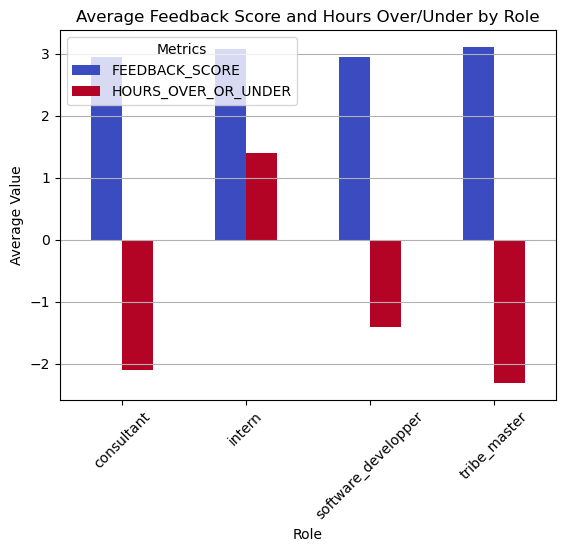

In [61]:
# Group the data by 'ROLE' and calculate the average 'FEEDBACK_SCORE' and 'HOURS_OVER_OR_UNDER'

grouped_data = df.groupby('ROLE').agg({'FEEDBACK_SCORE': 'mean', 'HOURS_OVER_OR_UNDER': 'mean'})
plt.figure(figsize=(12, 8))
grouped_data.plot(kind='bar', colormap='coolwarm')
plt.title('Average Feedback Score and Hours Over/Under by Role')
plt.xlabel('Role')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend(title='Metrics', loc='upper left')
plt.grid(axis='y')
plt.show()


C:\Users\AadishNagarajan\AppData\Local\Temp\ipykernel_13260\1010698776.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df2.groupby('Age Group')[['HOURS_OVER_OR_UNDER', 'ALLOCATION_DURATION']].mean().reset_index()


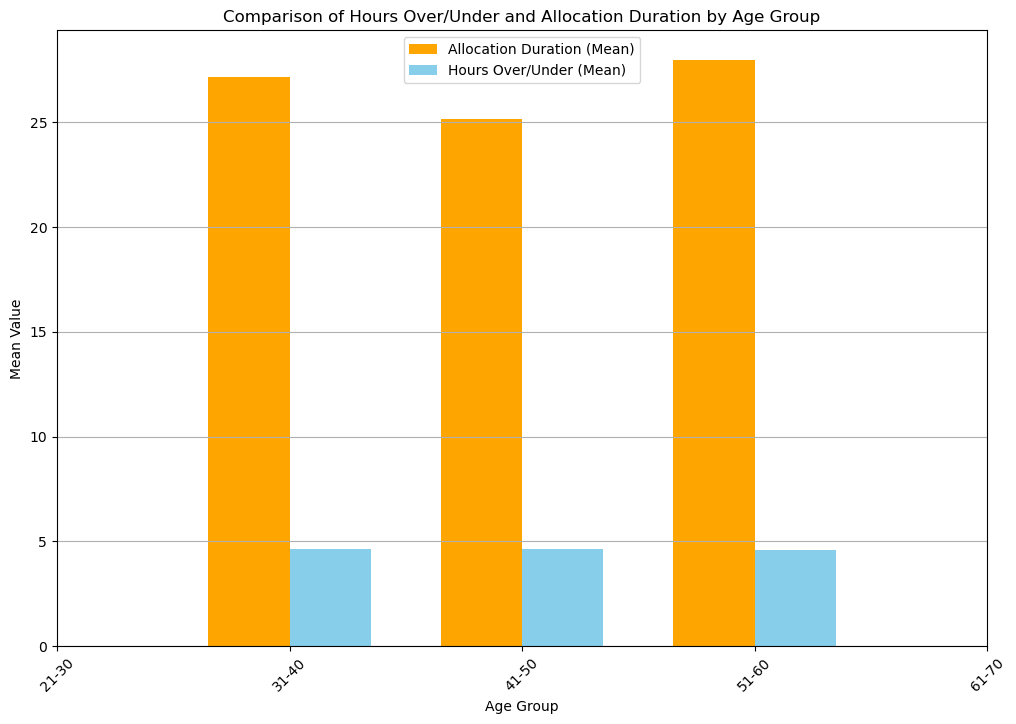

In [62]:
# Load the data from the CSV file
df2 = pd.read_csv('src_data.csv')

# Group the data by age ranges (you may need to define your own age ranges)
df2['Age Group'] = pd.cut(df2['AGE'], bins=[0, 20, 30, 40, 50, 60, ], labels=['21-30', '31-40', '41-50', '51-60', '61-70'])

# Group the data by 'Age Group', calculate the mean of 'HOURS_OVER_OR_UNDER' and 'ALLOCATION_DURATION'
grouped_data = df2.groupby('Age Group')[['HOURS_OVER_OR_UNDER', 'ALLOCATION_DURATION']].mean().reset_index()

# Define the width of each bar
bar_width = 0.35

# Get the x-axis positions for the bars
x = np.arange(len(grouped_data))

# Plot bar chart for Allocation Duration
plt.figure(figsize=(12, 8))
plt.bar(x - bar_width/2, grouped_data['ALLOCATION_DURATION'], width=bar_width, color='orange', label='Allocation Duration (Mean)')

# Plot bar chart for Hours Over/Under
plt.bar(x + bar_width/2, grouped_data['HOURS_OVER_OR_UNDER'], width=bar_width, color='skyblue', label='Hours Over/Under (Mean)')

plt.title('Comparison of Hours Over/Under and Allocation Duration by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Mean Value')
plt.xticks(x, grouped_data['Age Group'])  # Set x-axis tick labels
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [63]:
df

,FIRST_NAME,LAST_NAME,EMAIL,GENDER,DOB_DD_MM_YYYY,USER_TYPE,ROLE,AGE,CLIENT_NAME,PROJECT_NAME,...,FEEDBACK_END_PERIOD,Q1,Q2,Q3,Q4,Q5,Q6,FEEDBACK_COMMENTS,ATTENDANCE_REGULARIZATION,FEEDBACK_SCORE
0,Chiarra,Avrashin,cavrashin2p@fda.gov,Male,24-07-2000,User,software_developper,24,Reynolds LLC,Software_Developper,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1,Napoleon,Belfit,nbelfitnv@washington.edu,Male,21-04-1979,User,intern,45,Gerlach LLC,Software_Developper,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,Tawsha,Paridge,tparidge7w@furl.net,Male,01-02-1988,User,software_developper,36,"Keebler, Feil and Monahan",Software_Developper,...,2023-11-30,4.0,1.0,5.0,1.0,3.0,2.0,Experiencing burnout due to long hours.,1,2.666667
3,Poul,Candey,pcandeykz@ebay.com,Female,18-07-1987,User,consultant,37,Cummings Inc,Consulting,...,2024-02-16,2.0,2.0,3.0,1.0,4.0,4.0,Feeling stressed due to the project's impact o...,0,2.666667
4,Dal,MacAleese,dmacaleeserm@cyberchimps.com,Male,21-03-1991,User,intern,33,"Wyman, Langosh and Wiegand",Software_Developper,...,2023-04-26,4.0,4.0,3.0,5.0,4.0,2.0,Seeking guidance on managing project complexit...,0,3.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,Allison,Reinbach,areinbach8c@unicef.org,Male,20-09-1990,User,intern,34,"Crist, Harvey and Heaney",Software_Developper,...,2024-01-18,2.0,1.0,2.0,2.0,5.0,3.0,Experiencing difficulties in managing project ...,1,2.500000
3996,Maddy,Fendley,mfendley9n@chron.com,Female,26-07-1988,User,consultant,36,"Trantow, Bednar and Hills",Consulting,...,2024-03-07,3.0,3.0,1.0,3.0,4.0,3.0,Struggling with maintaining project stakeholde...,1,2.833333
3997,Hermina,Musker,hmuskermu@google.ca,Male,25-08-1977,User,tribe_master,47,"Heaney, Wyman and Gorczany",Software_Developper,...,2023-08-16,5.0,4.0,4.0,5.0,3.0,4.0,Struggling to balance multiple projects simult...,1,4.166667
3998,Dal,MacAleese,dmacaleeserm@cyberchimps.com,Male,03-09-1978,User,intern,46,"Wyman, Langosh and Wiegand",Software_Developper,...,2023-05-03,4.0,4.0,4.0,1.0,2.0,4.0,Concerns about the project's direction.,0,3.166667


# Feature Engineering

In [64]:
# Split date fields into day, month, and year and add them as new columns
date_columns = ["DOB_DD_MM_YYYY", "PROJECT_START_DATE", "PROJECT_END_DATE", "ALLOCATION_START", "ALLOCATION_END", "WEEK_START", "WEEK_END", "FEEDBACK_START_PERIOD", "FEEDBACK_END_PERIOD"]

# Convert date columns to string type
df[date_columns] = df[date_columns].astype(str)
for column in date_columns:
    # Split the date string into day, month, and year components
    split_date = df[column].str.split('-', n=2, expand=True)
    df[column + '_DAY'] = split_date[0]
    df[column + '_MONTH'] = split_date[1]
    df[column + '_YEAR'] = split_date[2]

print(df)



     FIRST_NAME  LAST_NAME                         EMAIL  GENDER  \
0       Chiarra   Avrashin           cavrashin2p@fda.gov    Male   
1      Napoleon     Belfit      nbelfitnv@washington.edu    Male   
2        Tawsha    Paridge           tparidge7w@furl.net    Male   
3          Poul     Candey            pcandeykz@ebay.com  Female   
4           Dal  MacAleese  dmacaleeserm@cyberchimps.com    Male   
...         ...        ...                           ...     ...   
3995    Allison   Reinbach        areinbach8c@unicef.org    Male   
3996      Maddy    Fendley          mfendley9n@chron.com  Female   
3997    Hermina     Musker           hmuskermu@google.ca    Male   
3998        Dal  MacAleese  dmacaleeserm@cyberchimps.com    Male   
3999      Briny    Kittman         bkittmannd@dyndns.org    Male   

     DOB_DD_MM_YYYY USER_TYPE                 ROLE  AGE  \
0        24-07-2000      User  software_developper   24   
1        21-04-1979      User               intern   45   
2     

In [65]:
df

,FIRST_NAME,LAST_NAME,EMAIL,GENDER,DOB_DD_MM_YYYY,USER_TYPE,ROLE,AGE,CLIENT_NAME,PROJECT_NAME,...,WEEK_START_YEAR,WEEK_END_DAY,WEEK_END_MONTH,WEEK_END_YEAR,FEEDBACK_START_PERIOD_DAY,FEEDBACK_START_PERIOD_MONTH,FEEDBACK_START_PERIOD_YEAR,FEEDBACK_END_PERIOD_DAY,FEEDBACK_END_PERIOD_MONTH,FEEDBACK_END_PERIOD_YEAR
0,Chiarra,Avrashin,cavrashin2p@fda.gov,Male,24-07-2000,User,software_developper,24,Reynolds LLC,Software_Developper,...,31,2024,02,07,nan,None,None,nan,None,None
1,Napoleon,Belfit,nbelfitnv@washington.edu,Male,21-04-1979,User,intern,45,Gerlach LLC,Software_Developper,...,21,2023,11,28,nan,None,None,nan,None,None
2,Tawsha,Paridge,tparidge7w@furl.net,Male,01-02-1988,User,software_developper,36,"Keebler, Feil and Monahan",Software_Developper,...,18,2023,12,25,2023,11,23,2023,11,30
3,Poul,Candey,pcandeykz@ebay.com,Female,18-07-1987,User,consultant,37,Cummings Inc,Consulting,...,06,2024,03,13,2024,02,09,2024,02,16
4,Dal,MacAleese,dmacaleeserm@cyberchimps.com,Male,21-03-1991,User,intern,33,"Wyman, Langosh and Wiegand",Software_Developper,...,11,2024,01,18,2023,04,19,2023,04,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,Allison,Reinbach,areinbach8c@unicef.org,Male,20-09-1990,User,intern,34,"Crist, Harvey and Heaney",Software_Developper,...,11,2024,01,18,2024,01,11,2024,01,18
3996,Maddy,Fendley,mfendley9n@chron.com,Female,26-07-1988,User,consultant,36,"Trantow, Bednar and Hills",Consulting,...,31,2023,06,07,2024,02,29,2024,03,07
3997,Hermina,Musker,hmuskermu@google.ca,Male,25-08-1977,User,tribe_master,47,"Heaney, Wyman and Gorczany",Software_Developper,...,29,2023,11,05,2023,08,09,2023,08,16
3998,Dal,MacAleese,dmacaleeserm@cyberchimps.com,Male,03-09-1978,User,intern,46,"Wyman, Langosh and Wiegand",Software_Developper,...,02,2023,12,09,2023,04,26,2023,05,03


In [66]:
# Drop rows with NaN values
df.dropna(inplace=True)
print(df)


     FIRST_NAME  LAST_NAME                         EMAIL  GENDER  \
2        Tawsha    Paridge           tparidge7w@furl.net    Male   
3          Poul     Candey            pcandeykz@ebay.com  Female   
4           Dal  MacAleese  dmacaleeserm@cyberchimps.com    Male   
5        Kirbee   Rosiello      krosielloqr@symantec.com  Female   
6        Jarvis      Arter        jartermc@google.com.br  Female   
...         ...        ...                           ...     ...   
3995    Allison   Reinbach        areinbach8c@unicef.org    Male   
3996      Maddy    Fendley          mfendley9n@chron.com  Female   
3997    Hermina     Musker           hmuskermu@google.ca    Male   
3998        Dal  MacAleese  dmacaleeserm@cyberchimps.com    Male   
3999      Briny    Kittman         bkittmannd@dyndns.org    Male   

     DOB_DD_MM_YYYY USER_TYPE                 ROLE  AGE  \
2        01-02-1988      User  software_developper   36   
3        18-07-1987      User           consultant   37   
4     

In [67]:
# Specify the columns to be dropped
columns_to_drop = ['DOB_DD_MM_YYYY', 'ALLOCATION_START', 'ALLOCATION_END', 'FEEDBACK_START_PERIOD', 'FEEDBACK_END_PERIOD']
df.drop(columns=columns_to_drop, inplace=True)
df


,FIRST_NAME,LAST_NAME,EMAIL,GENDER,USER_TYPE,ROLE,AGE,CLIENT_NAME,PROJECT_NAME,PROJECT_START_DATE,...,WEEK_START_YEAR,WEEK_END_DAY,WEEK_END_MONTH,WEEK_END_YEAR,FEEDBACK_START_PERIOD_DAY,FEEDBACK_START_PERIOD_MONTH,FEEDBACK_START_PERIOD_YEAR,FEEDBACK_END_PERIOD_DAY,FEEDBACK_END_PERIOD_MONTH,FEEDBACK_END_PERIOD_YEAR
2,Tawsha,Paridge,tparidge7w@furl.net,Male,User,software_developper,36,"Keebler, Feil and Monahan",Software_Developper,2023-05-02,...,18,2023,12,25,2023,11,23,2023,11,30
3,Poul,Candey,pcandeykz@ebay.com,Female,User,consultant,37,Cummings Inc,Consulting,2024-03-18,...,06,2024,03,13,2024,02,09,2024,02,16
4,Dal,MacAleese,dmacaleeserm@cyberchimps.com,Male,User,intern,33,"Wyman, Langosh and Wiegand",Software_Developper,2023-08-11,...,11,2024,01,18,2023,04,19,2023,04,26
5,Kirbee,Rosiello,krosielloqr@symantec.com,Female,User,tribe_master,45,Ledner LLC,Software_Developper,2023-10-30,...,10,2024,02,17,2024,01,31,2024,02,07
6,Jarvis,Arter,jartermc@google.com.br,Female,User,software_developper,23,"Walker, Williamson and Reilly",Software_Developper,2023-04-22,...,18,2023,12,25,2023,09,13,2023,09,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,Allison,Reinbach,areinbach8c@unicef.org,Male,User,intern,34,"Crist, Harvey and Heaney",Software_Developper,2023-08-19,...,11,2024,01,18,2024,01,11,2024,01,18
3996,Maddy,Fendley,mfendley9n@chron.com,Female,User,consultant,36,"Trantow, Bednar and Hills",Consulting,2023-12-07,...,31,2023,06,07,2024,02,29,2024,03,07
3997,Hermina,Musker,hmuskermu@google.ca,Male,User,tribe_master,47,"Heaney, Wyman and Gorczany",Software_Developper,2023-09-16,...,29,2023,11,05,2023,08,09,2023,08,16
3998,Dal,MacAleese,dmacaleeserm@cyberchimps.com,Male,User,intern,46,"Wyman, Langosh and Wiegand",Software_Developper,2023-08-11,...,02,2023,12,09,2023,04,26,2023,05,03


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2945 entries, 2 to 3999
Data columns (total 64 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   FIRST_NAME                   2945 non-null   object 
 1   LAST_NAME                    2945 non-null   object 
 2   EMAIL                        2945 non-null   object 
 3   GENDER                       2945 non-null   object 
 4   USER_TYPE                    2945 non-null   object 
 5   ROLE                         2945 non-null   object 
 6   AGE                          2945 non-null   int64  
 7   CLIENT_NAME                  2945 non-null   object 
 8   PROJECT_NAME                 2945 non-null   object 
 9   PROJECT_START_DATE           2945 non-null   object 
 10  PROJECT_END_DATE             2945 non-null   object 
 11  PROJECT_DURATION             2945 non-null   int64  
 12  PROJECT_CATEGORY             2945 non-null   object 
 13  ALLOCATION_DURATION    

In [69]:
columns_to_drop = ['FIRST_NAME', 'LAST_NAME','GENDER','FLAG','EMAIL','USER_TYPE','COMMENTS','AGE','DOB_DD_MM_YYYY_MONTH','DOB_DD_MM_YYYY_YEAR','DOB_DD_MM_YYYY_DAY', 'CLIENT_NAME', 'PROJECT_START_DATE', 'PROJECT_END_DATE','FEEDBACK_COMMENTS','WEEK_START','WEEK_END','FEEDBACK_START_PERIOD_DAY','FEEDBACK_START_PERIOD_MONTH','FEEDBACK_START_PERIOD_YEAR','FEEDBACK_END_PERIOD_DAY','FEEDBACK_END_PERIOD_MONTH','FEEDBACK_END_PERIOD_YEAR','Q1','Q2','Q3','Q4','Q5','Q6']
df = df.drop(columns=columns_to_drop)
df.head()


,ROLE,PROJECT_NAME,PROJECT_DURATION,PROJECT_CATEGORY,ALLOCATION_DURATION,ACTIVITY,MON,TUE,WED,THUR,...,ALLOCATION_START_YEAR,ALLOCATION_END_DAY,ALLOCATION_END_MONTH,ALLOCATION_END_YEAR,WEEK_START_DAY,WEEK_START_MONTH,WEEK_START_YEAR,WEEK_END_DAY,WEEK_END_MONTH,WEEK_END_YEAR
2,software_developper,Software_Developper,35,Mid Cap Project,14,sales_activity,6.0,6.0,1.0,3.0,...,2024,19,03,2024,2023,12,18,2023,12,25
3,consultant,Consulting,35,Mid Cap Project,42,sales_activity,2.0,8.0,1.0,11.0,...,2024,01,03,2024,2024,03,06,2024,03,13
4,intern,Software_Developper,35,Mid Cap Project,28,sales_activity,7.0,2.0,8.0,3.0,...,2023,06,11,2023,2024,01,11,2024,01,18
5,tribe_master,Software_Developper,28,Mid Cap Project,28,client_project,9.0,5.0,4.0,3.0,...,2023,12,11,2023,2024,02,10,2024,02,17
6,software_developper,Software_Developper,14,Small Cap Project,42,bau,9.0,7.0,2.0,4.0,...,2023,19,10,2023,2023,12,18,2023,12,25


In [70]:
from sklearn.preprocessing import LabelEncoder

#Data Encoding

# Initialize LabelEncoder
label_encoder = LabelEncoder()

df['ROLE'] = label_encoder.fit_transform(df['ROLE'])
df['PROJECT_NAME'] = label_encoder.fit_transform(df['PROJECT_NAME'])

# Display the DataFrame after conversion
df.head()

,ROLE,PROJECT_NAME,PROJECT_DURATION,PROJECT_CATEGORY,ALLOCATION_DURATION,ACTIVITY,MON,TUE,WED,THUR,...,ALLOCATION_START_YEAR,ALLOCATION_END_DAY,ALLOCATION_END_MONTH,ALLOCATION_END_YEAR,WEEK_START_DAY,WEEK_START_MONTH,WEEK_START_YEAR,WEEK_END_DAY,WEEK_END_MONTH,WEEK_END_YEAR
2,2,2,35,Mid Cap Project,14,sales_activity,6.0,6.0,1.0,3.0,...,2024,19,03,2024,2023,12,18,2023,12,25
3,0,0,35,Mid Cap Project,42,sales_activity,2.0,8.0,1.0,11.0,...,2024,01,03,2024,2024,03,06,2024,03,13
4,1,2,35,Mid Cap Project,28,sales_activity,7.0,2.0,8.0,3.0,...,2023,06,11,2023,2024,01,11,2024,01,18
5,3,2,28,Mid Cap Project,28,client_project,9.0,5.0,4.0,3.0,...,2023,12,11,2023,2024,02,10,2024,02,17
6,2,2,14,Small Cap Project,42,bau,9.0,7.0,2.0,4.0,...,2023,19,10,2023,2023,12,18,2023,12,25


In [71]:
df

,ROLE,PROJECT_NAME,PROJECT_DURATION,PROJECT_CATEGORY,ALLOCATION_DURATION,ACTIVITY,MON,TUE,WED,THUR,...,ALLOCATION_START_YEAR,ALLOCATION_END_DAY,ALLOCATION_END_MONTH,ALLOCATION_END_YEAR,WEEK_START_DAY,WEEK_START_MONTH,WEEK_START_YEAR,WEEK_END_DAY,WEEK_END_MONTH,WEEK_END_YEAR
2,2,2,35,Mid Cap Project,14,sales_activity,6.0,6.0,1.0,3.0,...,2024,19,03,2024,2023,12,18,2023,12,25
3,0,0,35,Mid Cap Project,42,sales_activity,2.0,8.0,1.0,11.0,...,2024,01,03,2024,2024,03,06,2024,03,13
4,1,2,35,Mid Cap Project,28,sales_activity,7.0,2.0,8.0,3.0,...,2023,06,11,2023,2024,01,11,2024,01,18
5,3,2,28,Mid Cap Project,28,client_project,9.0,5.0,4.0,3.0,...,2023,12,11,2023,2024,02,10,2024,02,17
6,2,2,14,Small Cap Project,42,bau,9.0,7.0,2.0,4.0,...,2023,19,10,2023,2023,12,18,2023,12,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,2,35,Mid Cap Project,28,client_project,5.0,5.0,3.0,10.0,...,2023,23,11,2023,2024,01,11,2024,01,18
3996,0,0,14,Small Cap Project,21,sales_activity,3.0,5.0,12.0,2.0,...,2023,21,12,2023,2023,05,31,2023,06,07
3997,3,2,42,Mid Cap Project,42,bau,1.0,11.0,3.0,5.0,...,2024,25,04,2024,2023,10,29,2023,11,05
3998,1,2,35,Mid Cap Project,28,client_project,1.0,12.0,6.0,7.0,...,2023,06,11,2023,2023,12,02,2023,12,09


In [72]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['project_category'] = label_encoder.fit_transform(df['PROJECT_CATEGORY'])

# Show the updated DataFrame
print(df)


      ROLE  PROJECT_NAME  PROJECT_DURATION   PROJECT_CATEGORY  \
2        2             2                35    Mid Cap Project   
3        0             0                35    Mid Cap Project   
4        1             2                35    Mid Cap Project   
5        3             2                28    Mid Cap Project   
6        2             2                14  Small Cap Project   
...    ...           ...               ...                ...   
3995     1             2                35    Mid Cap Project   
3996     0             0                14  Small Cap Project   
3997     3             2                42    Mid Cap Project   
3998     1             2                35    Mid Cap Project   
3999     3             2                35    Mid Cap Project   

      ALLOCATION_DURATION        ACTIVITY  MON   TUE   WED  THUR  ...  \
2                      14  sales_activity  6.0   6.0   1.0   3.0  ...   
3                      42  sales_activity  2.0   8.0   1.0  11.0  ...   


In [73]:
string_cols = df.select_dtypes(include=['object']).columns
df[string_cols] = df[string_cols].astype('category')
df['ROLE'] = df['ROLE'].astype('int64')
df['PROJECT_CATEGORY'] = df['PROJECT_CATEGORY'].astype('category')

# Display the updated DataFrame info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2945 entries, 2 to 3999
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   ROLE                       2945 non-null   int64   
 1   PROJECT_NAME               2945 non-null   int32   
 2   PROJECT_DURATION           2945 non-null   int64   
 3   PROJECT_CATEGORY           2945 non-null   category
 4   ALLOCATION_DURATION        2945 non-null   int64   
 5   ACTIVITY                   2945 non-null   category
 6   MON                        2945 non-null   float64 
 7   TUE                        2945 non-null   float64 
 8   WED                        2945 non-null   float64 
 9   THUR                       2945 non-null   float64 
 10  FRI                        2945 non-null   float64 
 11  SAT                        2945 non-null   float64 
 12  SUN                        2945 non-null   float64 
 13  TOTAL_WEEK_HOURS           2945 non-nu

In [74]:
df.columns

Index(['ROLE', 'PROJECT_NAME', 'PROJECT_DURATION', 'PROJECT_CATEGORY',
       'ALLOCATION_DURATION', 'ACTIVITY', 'MON', 'TUE', 'WED', 'THUR', 'FRI',
       'SAT', 'SUN', 'TOTAL_WEEK_HOURS', 'HOURS_OVER_OR_UNDER',
       'ATTENDANCE_REGULARIZATION', 'FEEDBACK_SCORE', 'PROJECT_START_DATE_DAY',
       'PROJECT_START_DATE_MONTH', 'PROJECT_START_DATE_YEAR',
       'PROJECT_END_DATE_DAY', 'PROJECT_END_DATE_MONTH',
       'PROJECT_END_DATE_YEAR', 'ALLOCATION_START_DAY',
       'ALLOCATION_START_MONTH', 'ALLOCATION_START_YEAR', 'ALLOCATION_END_DAY',
       'ALLOCATION_END_MONTH', 'ALLOCATION_END_YEAR', 'WEEK_START_DAY',
       'WEEK_START_MONTH', 'WEEK_START_YEAR', 'WEEK_END_DAY', 'WEEK_END_MONTH',
       'WEEK_END_YEAR', 'project_category'],
      dtype='object')

In [75]:
df['PROJECT_CATEGORY'] = pd.Categorical(df['PROJECT_CATEGORY']).codes
df['ACTIVITY'] = pd.Categorical(df['ACTIVITY']).codes

In [76]:
print(df)


      ROLE  PROJECT_NAME  PROJECT_DURATION  PROJECT_CATEGORY  \
2        2             2                35                 0   
3        0             0                35                 0   
4        1             2                35                 0   
5        3             2                28                 0   
6        2             2                14                 1   
...    ...           ...               ...               ...   
3995     1             2                35                 0   
3996     0             0                14                 1   
3997     3             2                42                 0   
3998     1             2                35                 0   
3999     3             2                35                 0   

      ALLOCATION_DURATION  ACTIVITY  MON   TUE   WED  THUR  ...  \
2                      14         2  6.0   6.0   1.0   3.0  ...   
3                      42         2  2.0   8.0   1.0  11.0  ...   
4                      28     

In [77]:
from scipy.stats import spearmanr

# Compute Spearman correlation coefficients for all features
spearman_corr = df.corr(method='spearman')

# Display the Spearman correlation coefficients
print("Spearman correlation coefficients:")
print(spearman_corr)



Spearman correlation coefficients:
                               ROLE  PROJECT_NAME  PROJECT_DURATION  \
ROLE                       1.000000      0.051293          0.072330   
PROJECT_NAME               0.051293      1.000000         -0.075843   
PROJECT_DURATION           0.072330     -0.075843          1.000000   
PROJECT_CATEGORY          -0.068010      0.053981         -0.712665   
ALLOCATION_DURATION        0.197369     -0.022598          0.012835   
ACTIVITY                  -0.007825     -0.119099          0.048836   
MON                       -0.111529     -0.068680         -0.107988   
TUE                        0.109079     -0.108161          0.092237   
WED                       -0.010843      0.043945          0.000849   
THUR                      -0.016656     -0.069084          0.012368   
FRI                        0.103693      0.014041          0.012713   
SAT                       -0.111037     -0.013793         -0.148131   
SUN                       -0.118639     -0

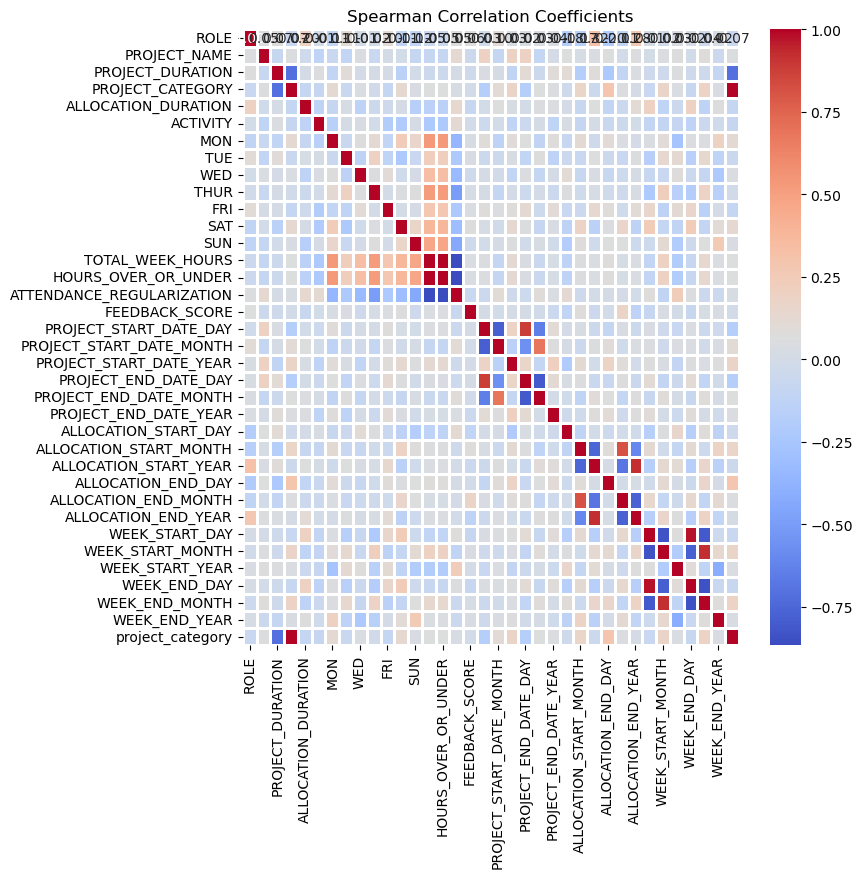

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute Spearman correlation coefficients for all features
spearman_corr = df.corr(method='spearman')

# Plot heatmap with larger box sizes
plt.figure(figsize=(8, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=2)
plt.title('Spearman Correlation Coefficients')
plt.show()


In [79]:
df.to_csv('processed_data.csv', index=False)


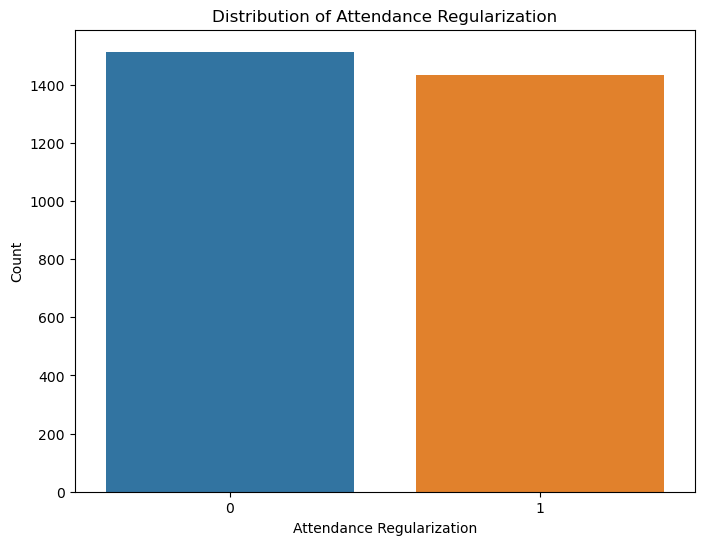

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of attendance_regularization
plt.figure(figsize=(8, 6))
sns.countplot(x='ATTENDANCE_REGULARIZATION', data=df)
plt.title('Distribution of Attendance Regularization')
plt.xlabel('Attendance Regularization')
plt.ylabel('Count')
plt.show()


In [81]:
df.columns

Index(['ROLE', 'PROJECT_NAME', 'PROJECT_DURATION', 'PROJECT_CATEGORY',
       'ALLOCATION_DURATION', 'ACTIVITY', 'MON', 'TUE', 'WED', 'THUR', 'FRI',
       'SAT', 'SUN', 'TOTAL_WEEK_HOURS', 'HOURS_OVER_OR_UNDER',
       'ATTENDANCE_REGULARIZATION', 'FEEDBACK_SCORE', 'PROJECT_START_DATE_DAY',
       'PROJECT_START_DATE_MONTH', 'PROJECT_START_DATE_YEAR',
       'PROJECT_END_DATE_DAY', 'PROJECT_END_DATE_MONTH',
       'PROJECT_END_DATE_YEAR', 'ALLOCATION_START_DAY',
       'ALLOCATION_START_MONTH', 'ALLOCATION_START_YEAR', 'ALLOCATION_END_DAY',
       'ALLOCATION_END_MONTH', 'ALLOCATION_END_YEAR', 'WEEK_START_DAY',
       'WEEK_START_MONTH', 'WEEK_START_YEAR', 'WEEK_END_DAY', 'WEEK_END_MONTH',
       'WEEK_END_YEAR', 'project_category'],
      dtype='object')

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler

# Separate the features (X) and the target variable (y)
X = df.drop(columns=['ATTENDANCE_REGULARIZATION'])
y = df['ATTENDANCE_REGULARIZATION']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

undersampler = RandomUnderSampler(random_state=22)
X_balanced, y_balanced = undersampler.fit_resample(X_train, y_train)
svm_classifier = SVC(kernel='rbf', C=0.1, gamma='scale')
svm_classifier.fit(X_balanced, y_balanced)
svm_predictions = svm_classifier.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_classification_report = classification_report(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)
print("SVM Classification Report:\n", svm_classification_report)



SVM Accuracy: 0.8106960950764007
SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.64      0.78       614
           1       0.72      1.00      0.83       564

    accuracy                           0.81      1178
   macro avg       0.86      0.82      0.81      1178
weighted avg       0.86      0.81      0.81      1178



In [83]:
new_data = pd.read_csv("new_data.csv")
predictions = svm_classifier.predict(new_data)
new_data['attendance_regularization_prediction'] = predictions
print(new_data)


   ROLE  PROJECT_NAME  PROJECT_DURATION  PROJECT_CATEGORY  \
0     2             0                21                 0   
1     2             2                28                 0   

   ALLOCATION_DURATION  ACTIVITY  MON  TUE  WED  THUR  ...  \
0                   42         0    8    3    5    10  ...   
1                   21         2   10    1    8     5  ...   

   ALLOCATION_END_MONTH  ALLOCATION_END_YEAR  WEEK_START_DAY  \
0                     7                 2023            2024   
1                     3                 2024            2023   

   WEEK_START_MONTH  WEEK_START_YEAR  WEEK_END_DAY  WEEK_END_MONTH  \
0                 1               20          2024               1   
1                 7                4          2023               7   

   WEEK_END_YEAR  project_category  attendance_regularization_prediction  
0             27                 0                                     0  
1             11                 0                                     1  


Sentiment Distribution:
sentiment
neutral     26494
positive    20090
negative    12870
Name: count, dtype: int64


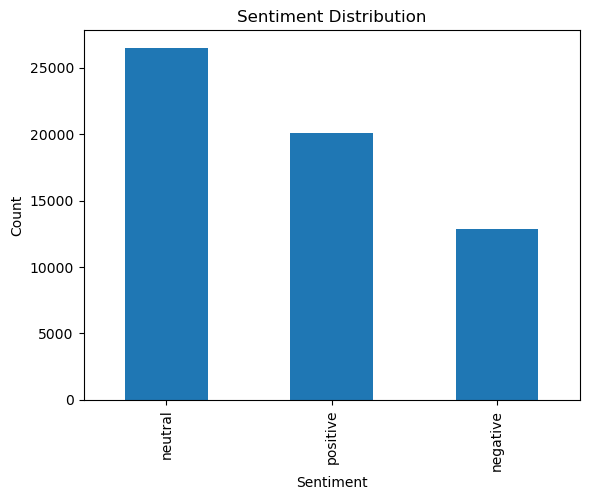

In [84]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('src_data.csv')  
feedback_comments = data['FEEDBACK_COMMENTS']
sid = SentimentIntensityAnalyzer()
sentiment_scores = []
for comment in feedback_comments:
    if isinstance(comment, str):
        sentiment_score = sid.polarity_scores(comment)
        sentiment_scores.append(sentiment_score)
    else:
        sentiment_scores.append({'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0})

sentiment_df = pd.DataFrame(sentiment_scores)
sentiment_df['sentiment'] = sentiment_df['compound'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))
print("Sentiment Distribution:")
print(sentiment_df['sentiment'].value_counts())

sentiment_df['sentiment'].value_counts().plot(kind='bar', title='Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [91]:
sid = SentimentIntensityAnalyzer()

input_text = "This week tasks are very interesting."

sentiment_score = sid.polarity_scores(input_text)

if sentiment_score['compound'] >= 0.05:
    sentiment_label = 'positive'
elif sentiment_score['compound'] <= -0.05:
    sentiment_label = 'negative'
else:
    sentiment_label = 'neutral'
print("Sentiment Score:", sentiment_score)
print("Sentiment Label:", sentiment_label)


Sentiment Score: {'neg': 0.0, 'neu': 0.626, 'pos': 0.374, 'compound': 0.4576}
Sentiment Label: positive
